In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA of DATA

In [102]:
df  = pd.read_csv("task4spamemaildata.csv" ,encoding = 'ISO-8859-1')

In [103]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [104]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [105]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3" , "Unnamed: 4"] , inplace = True)

In [106]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [107]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [108]:
df.duplicated().sum()

403

In [109]:
df.drop_duplicates(keep='first',inplace=True)

In [110]:
df.duplicated().sum()


0

In [111]:
df.size

10338

In [112]:
df.groupby("v1").describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4516   4516  Go until jurong point, crazy.. Available only ...    1
spam   653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [113]:
df["length"] =  df["v2"].apply(len)
df.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


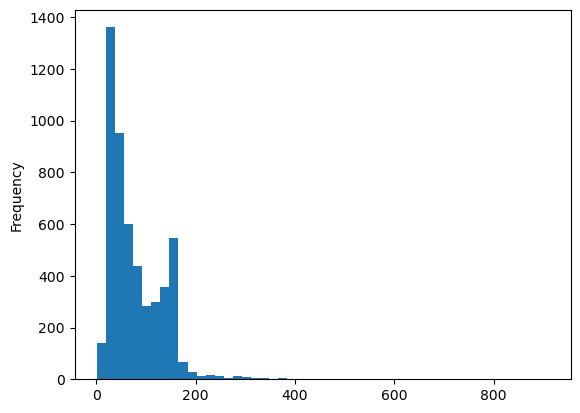

In [114]:
df["length"].plot(bins = 50 , kind="hist")
plt.show()

In [115]:
df.length.describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64

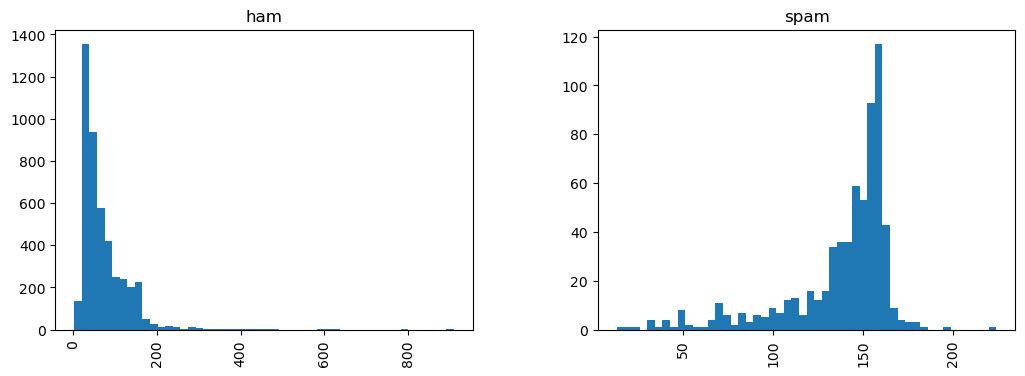

In [116]:
df.hist(column='length', by='v1', bins=50,figsize=(12,4))
plt.show()

In [117]:
df[df["v1"] == "ham"]["length"].mean()

70.45925597874225

In [118]:
df[df["v1"] == "spam"]["length"].mean()

137.89127105666157

# Text Pre - Processing 

In [119]:
import string


In [120]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Ryzen
[nltk_data]     5.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    remove all punc , stop word and return all in sentences in list
    """
   
    nopunc = [char for char in mess if char not in string.punctuation]

  
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
msg_train, msg_test, label_train, label_test = train_test_split(df['v2'], df['v1'], test_size=0.2)


# creating the pipeline for Naive Bais

In [125]:
pipelineNB = Pipeline([("bow" , CountVectorizer(analyzer=text_process)),
                      ("tfidf", TfidfTransformer()),
                       ("classifier" , MultinomialNB())])

In [126]:
pipelineNB.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FA32F8FC40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [127]:
predictions = pipelineNB.predict(msg_test)

In [128]:
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       952
        spam       0.67      1.00      0.80        82

    accuracy                           0.96      1034
   macro avg       0.83      0.98      0.89      1034
weighted avg       0.97      0.96      0.96      1034

[[911  41]
 [  0  82]]


# creating the pipeline for SVM

In [129]:
from sklearn.svm import SVC


In [130]:
pipelineSVM = Pipeline([("bow" , CountVectorizer(analyzer=text_process)),
                      ("tfidf", TfidfTransformer()),
                       ("classifier" , SVC())])

In [131]:
pipelineSVM.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FA32F8FC40>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [132]:
predictions = pipelineSVM.predict(msg_test)

In [133]:
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99       935
        spam       0.80      0.99      0.88        99

    accuracy                           0.97      1034
   macro avg       0.90      0.98      0.93      1034
weighted avg       0.98      0.97      0.98      1034

[[910  25]
 [  1  98]]


# creating the pipeline for Linear Regeession

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
pipelineLR = Pipeline([("bow" , CountVectorizer(analyzer=text_process)),
                      ("tfidf", TfidfTransformer()),
                       ("classifier" , LogisticRegression())])

In [136]:
pipelineLR.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FA32F8FC40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [137]:
predictions = pipelineLR.predict(msg_test)

In [138]:
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98       954
        spam       0.64      0.99      0.78        80

    accuracy                           0.96      1034
   macro avg       0.82      0.97      0.88      1034
weighted avg       0.97      0.96      0.96      1034

[[910  44]
 [  1  79]]
